## Climatology

In [1]:
import numpy as np
from glob import glob
import xarray as xr
import matplotlib.pyplot as plt
import cmocean
from copy import copy
import matplotlib as mpl
import matplotlib.colors as mcolors
import matplotlib.gridspec as gridspec
import cartopy.crs as ccrs
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
import warnings
warnings.filterwarnings("ignore")

In [6]:
datadir = '/Users/rfische1/Documents/UU/Nitrate_Profiles/'#'/data/oceanparcels/output_data/data_Delphine/' #'/nethome/lobel001/biofouling_3dtransport_2/Simulation/Sim_output/' #/data/oceanparcels/output_data/data_Reint/' #

In [3]:
regions = {'EqPac': 'Equatorial Pacific',
           'GPGP': 'Great Pacific Garbage Patch',
           'SO': 'Southern Ocean',
           'NPSG': 'North Pacific Subtropical Gyre'}

In [4]:
yr = '2004'
# dirread_NEMO = '/data/oceanparcels/input_data/NEMO-MEDUSA/ORCA0083-N006/means/'
# tsfiles_NEMO = sorted(glob(dirread_NEMO+'ORCA0083-N06_'+yr+'*d05T.nc'))
# ds_ts_NEMO = xr.open_dataset(tsfiles_NEMO[0])

In [5]:
region='NPSG'

In [11]:
pp_array = np.zeros((12,75))
no3_array = np.zeros((12,75))
for i in np.arange(1,13):
    mn =str(i).zfill(2)
    climatology = np.load(datadir+region+'_climatology_DIN'+yr+mn+'.npy')
#     d_array[i-1] = climatology[0]
    no3_array[i-1] = climatology[0]
    pp_array[i-1] = climatology[1]

In [8]:
# climatology = np.load(datadir+region+'_climatology'+yr+mn+'.npy')

In [8]:
D_profile = climatology[0]
PP_profile = climatology[1]
kpp_profile = climatology[2]

In [12]:
nemo_z = [0, 1.023907, 2.10319, 3.251309, 4.485053, 5.825238, 7.297443,
    8.932686, 10.7679, 12.84599, 15.21527, 17.92792, 21.03757, 24.59599,
    28.64965, 33.23697, 38.3871, 44.12101, 50.45447, 57.40257, 64.9846,
    73.2287, 82.17556, 91.88141, 102.4202, 113.8852, 126.3909, 140.074,
    155.095, 171.6402, 189.9228, 210.1845, 232.697, 257.7629, 285.7158,
    316.9199, 351.768, 390.6786, 434.0905, 482.4563, 536.2332, 595.8721,
    661.8052, 734.4321, 814.1057, 901.118, 995.6885, 1097.954, 1207.963,
    1325.672, 1450.95, 1583.582, 1723.28, 1869.693, 2022.425, 2181.044,
    2345.101, 2514.137, 2687.699, 2865.347, 3046.659, 3231.24, 3418.723,
    3608.769, 3801.072, 3995.354, 4191.367, 4388.89, 4587.726, 4787.702,
    4988.667, 5190.488, 5393.049, 5596.249, 5800]
# depth = np.array(nemo_z)*-1
depth = [-0.51, -1.56, -2.67, -3.86, -5.14, -6.54, -8.09, -9.82, -11.77, -13.99, -16.53, -19.43, -22.76, -26.56, -30.87, -35.74, -41.18, -47.21, -53.85, -61.11, -69.02, -77.61, -86.93, -97.04, -108.03, -120, -133.08, -147.41, -163.16, -180.55, -199.79, -221.14, -244.89, -271.36, -300.89, -333.86, -370.69, -411.79, -457.63, -508.64, -565.29, -628.03, -697.26, -773.37, -856.68, -947.45, -1045.85, -1151.99, -1265.86, -1387.38, -1516.36, -1652.57, -1795.67, -1945.30, -2101.03, -2262.42, -2429.03, -2600.38, -2776.04, -2955.57, -3138.56, -3324.64, -3513.45, -3704.66, -3897.98, -4093.16, -4289.95, -4488.15, -4687.58, -4888.07, -5089.48, -5291.68, -5494.58, -5698.06, -5902.06]

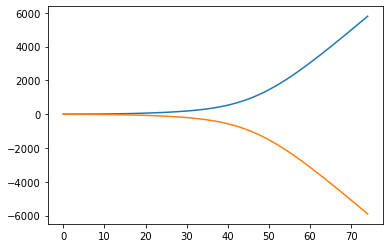

In [13]:
plt.plot(nemo_z)
plt.plot(depth)

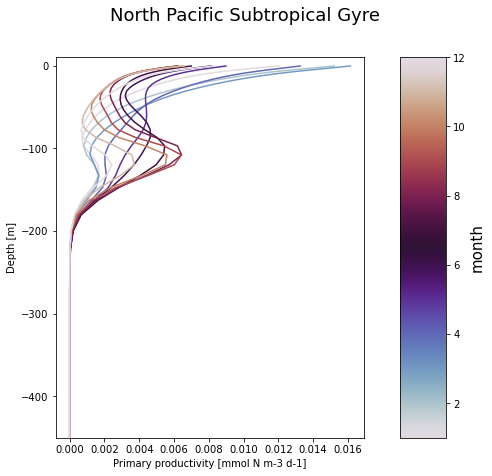

In [30]:
fig = plt.figure(figsize=(7,7))
fig.suptitle(regions[region], fontsize=18)

gs = gridspec.GridSpec(ncols=2, nrows=1, width_ratios=[1,0.15], figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])

ax1.set_ylabel("Depth [m]")
ax1.set_xlabel("Primary productivity [mmol N m-3 d-1]")

n = 12
colors = plt.cm.twilight(np.linspace(0,1,n))

for i in range(12):
    ax1.plot(pp_array[i], depth, color=colors[i], label='PP')

ax1.set_ylim(-450, 10)
# ax1.set_xlim(-0.00002,0.0002)

cmap = plt.cm.twilight
norm = mpl.colors.Normalize(vmin=1, vmax=12)

cb1 = mpl.colorbar.ColorbarBase(ax2, cmap=cmap,
                                norm=norm)

cb1.set_label('month', fontsize=15)
# plt.savefig(datadir+'subsurface_maximum')


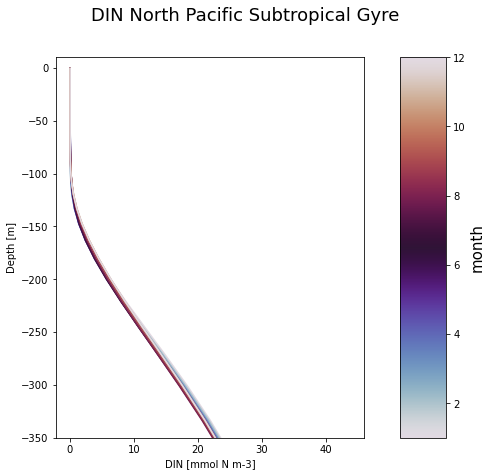

In [19]:
fig = plt.figure(figsize=(7,7))
fig.suptitle('DIN '+regions[region], fontsize=18)

gs = gridspec.GridSpec(ncols=2, nrows=1, width_ratios=[1,0.15], figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])

ax1.set_ylabel("Depth [m]")
ax1.set_xlabel("DIN [mmol N m-3]")

n = 12
colors = plt.cm.twilight(np.linspace(0,1,n))

for i in range(12):
    ax1.plot(no3_array[i], depth, color=colors[i], label='PP')

ax1.set_ylim(-2.5, 25)
ax1.set_ylim(-350, 10)
# ax1.set_xlim(-0.00002,0.0002)

cmap = plt.cm.twilight
norm = mpl.colors.Normalize(vmin=1, vmax=12)

cb1 = mpl.colorbar.ColorbarBase(ax2, cmap=cmap,
                                norm=norm)

cb1.set_label('month', fontsize=15)
plt.savefig(datadir+'DIN_subsurface_maximum')

TypeError: __init__() missing 1 required positional argument: 'ax'

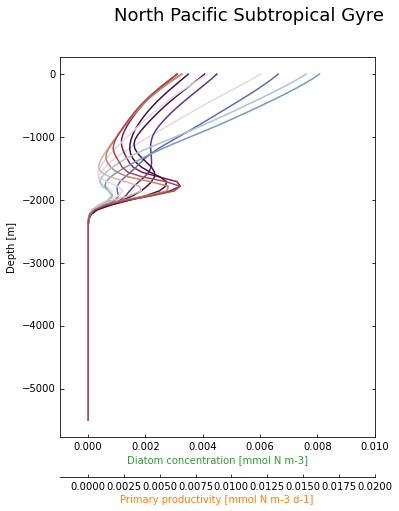

In [64]:
fig = plt.figure(figsize=(7,7), constrained_layout=True)
fig.suptitle(regions[region], fontsize=18)

host = host_subplot(111, axes_class=AA.Axes)
plt.subplots_adjust(right=0.75)

par1 = host.twiny()
# par2 = host.twiny()

offset = 40
new_fixed_axis = par1.get_grid_helper().new_fixed_axis
par1.axis["bottom"] = new_fixed_axis(loc="bottom",
                                    axes=par1,
                                    offset=(0, -offset))

par1.axis["bottom"].toggle(all=True)
par1.axis["top"].toggle(all=False)
# par2.axis["top"].toggle(all=True)

# host.set_ylim(505, -5)
# host.set_ylim(205, -5)

host.set_xlabel("Diatom concentration [mmol N m-3]")
host.set_ylabel("Depth [m]")
par1.set_xlabel("Primary productivity [mmol N m-3 d-1]")
# par2.set_xlabel("Vertical diffusivity [m2 s-1]")

# host.plot(d_array.T, depth, c='tab:green', label='diatoms')
n = 12
colors = plt.cm.twilight(np.linspace(0,1,n))

for i in range(12):
    par1.plot(pp_array[i], depth, color=colors[i], label='PP')
# p3, = par2.plot(kpp_profile, ds_ts_NEMO['deptht'], c='tab:blue', label='KPP')

host.set_xlim(-0.001,0.01)
par1.set_xlim(-0.002,0.02)
# par2.set_xlim(-0.0115,0.115)

# host.vlines(0,-10,210,color='silver',linewidth=1)
# host.legend(loc = 'lower right')

host.axis["bottom"].label.set_color('tab:green')
par1.axis["bottom"].label.set_color(p2.get_color())
# par2.axis["top"].label.set_color(p3.get_color())
cmap = plt.cm.twilight
norm = mpl.colors.Normalize(vmin=1, vmax=12)

cb1 = mpl.colorbar.ColorbarBase(cmap=cmap,
                                norm=norm,
                                orientation='horizontal')


In [8]:
climatology_SO = np.load('/data/oceanparcels/output_data/data_Reint/SO_climatology.npy')
climatology_EqPac = np.load('/data/oceanparcels/output_data/data_Reint/EqPac_climatology.npy')
climatology_NPSG = np.load('/data/oceanparcels/output_data/data_Reint/NPSG_climatology.npy')

In [9]:
kpp_profile0 = climatology_EqPac[2]
kpp_profile1 = climatology_NPSG[2]
kpp_profile2 = climatology_SO[2]

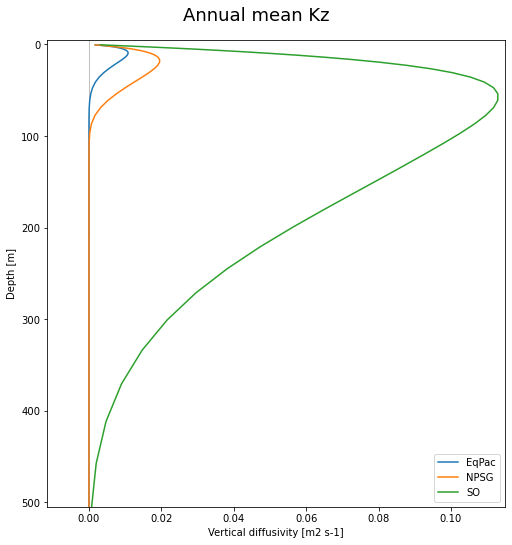

In [10]:
fig = plt.figure(figsize=(7,7), constrained_layout=True)
fig.suptitle('Annual mean Kz', fontsize=18, y=1.06)

ax=plt.axes()

ax.set_ylim(505, -5)

ax.set_xlabel("Vertical diffusivity [m2 s-1]")
ax.set_ylabel("Depth [m]")

ax.plot(kpp_profile0, ds_ts_NEMO['deptht'], label='EqPac')
ax.plot(kpp_profile1, ds_ts_NEMO['deptht'], label='NPSG')
ax.plot(kpp_profile2, ds_ts_NEMO['deptht'], label='SO')

ax.set_xlim(-0.0115,0.115)

ax.vlines(0,-10,210,color='silver',linewidth=1)
ax.legend(loc = 'lower right')
